In [4]:
x_t = 49599
y_t = 21447
x_v = 6100
y_v = 2779
x_ts = 6138
y_ts = 2750
s = sum(x_t, y_t, x_v, y_v, x_ts, y_ts)
print(f'Train:{x_t + y_t}({(x_t + y_t)/s*100:.2f}%)')
print(f'市民:{((x_t) / (x+y_t)) * 100:.2f}%')
print(f'人狼:{((y_t) / (x+y_t)) * 100:.2f}%')
print(f'Valid:{x_v + y_v}({(x_v + y_v)/s*100:.2f}%)')
print(f'市民:{((x_v) / (x_v+y_v)) * 100:.2f}%')
print(f'人狼:{((y_v) / (x_v+y_v)) * 100:.2f}%')
print(f'Test:{x_ts + y_ts}({(x_ts + y_ts)/s*100:.2f}%)')
print(f'市民:{((x_ts) / (x_ts+y_ts)) * 100:.2f}%')
print(f'人狼:{((y_ts) / (x_ts+y_ts)) * 100:.2f}%')

TypeError: sum() takes at most 2 arguments (6 given)

In [5]:
!ls ../../outputs/nested/HAN/baseline/200_dim200_ignore_pad_sp_new/plot_attention_uni-gram

FN  FN.html  FP  FP.html  TN  TN.html  TP  TP.html  csv  index.html


In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
font_path = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

def create_wordcloud(df):
    d = {}
    for a, x in df.values:
        d[a] = x
    wordcloud = WordCloud(font_path=font_path, background_color='white')
    wordcloud.generate_from_frequencies(frequencies=d)
    return wordcloud

# Uni-gram

In [30]:
import pandas as pd
import os

input_dir = '../../outputs/nested/HAN/baseline/200_dim200_ignore_pad_sp_new/plot_attention_uni-gram/csv/'

FN_60_50 = pd.read_csv(os.path.join(input_dir, 'FN_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_60_50 = pd.read_csv(os.path.join(input_dir, 'FP_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_60_50 = pd.read_csv(os.path.join(input_dir, 'TN_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_60_50 = pd.read_csv(os.path.join(input_dir, 'TP_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FN_70 = pd.read_csv(os.path.join(input_dir, 'FN_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_70 = pd.read_csv(os.path.join(input_dir, 'FP_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_70 = pd.read_csv(os.path.join(input_dir, 'TN_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_70 = pd.read_csv(os.path.join(input_dir, 'TP_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FN_80 = pd.read_csv(os.path.join(input_dir, 'FN_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_80 = pd.read_csv(os.path.join(input_dir, 'FP_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_80 = pd.read_csv(os.path.join(input_dir, 'TN_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_80 = pd.read_csv(os.path.join(input_dir, 'TP_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FN_90 = pd.read_csv(os.path.join(input_dir, 'FN_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_90 = pd.read_csv(os.path.join(input_dir, 'FP_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_90 = pd.read_csv(os.path.join(input_dir, 'TN_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_90 = pd.read_csv(os.path.join(input_dir, 'TP_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')

#TP = TP_90
#TN = TN_90
#FP = FP_90
#FN = FN_90
TP = pd.concat((TP_90, TP_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
TN = pd.concat((TN_90, TN_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
FP = pd.concat((FP_90, FP_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
FN = pd.concat((FN_90, FN_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()


set_TP = set(TP['token'])
set_TN = set(TN['token'])
set_FP = set(FP['token'])
set_FN = set(FN['token'])

u_TP = ((set_TP - set_TN) - set_FP) - set_FN
u_TN = ((set_TN - set_TP) - set_FP) - set_FN
u_FP = ((set_FP - set_TN) - set_TP) - set_FN
u_FN = ((set_FN - set_TN) - set_FP) - set_TP
u_TP = TP[TP['token'].isin(list(u_TP))].sort_values(by='freq', ascending=False)
u_TN = TN[TN['token'].isin(list(u_TN))].sort_values(by='freq', ascending=False)
u_FP = FP[FP['token'].isin(list(u_FP))].sort_values(by='freq', ascending=False)
u_FN = FN[FN['token'].isin(list(u_FN))].sort_values(by='freq', ascending=False)


u_positive = (set_TP - set_TN) - set_FN
u_negative= (set_TN - set_TP) - set_FP
u_positive = TP[TP['token'].isin(list(u_positive))].sort_values(by='freq', ascending=False)
u_negative = TN[TN['token'].isin(list(u_negative))].sort_values(by='freq', ascending=False)

print("u_TP", len(u_TP))
print("u_TN", len(u_TN))
print("u_FP", len(u_FP))
print("u_FN", len(u_FN))
print("u_positive", len(u_positive))
print("u_negative", len(u_negative))


u_TP 2013
u_TN 5008
u_FP 157
u_FN 485
u_positive 2079
u_negative 5999


In [34]:
print('TP')
display(TP[:20])
print('TN')
display(TN[:20])
print('FP')
display(FP[:20])
print('FN')
display(FN[:20])

TP


token  freq
0          ?  1740
1        ...  1430
2   ＜person＞  1146
3          )   839
4         誘導   742
5        タイプ   713
6         感じ   676
7         理解   609
8       ちょっと   521
9       ...。   481
10       ・・・   478
11        って   475
12        なら   469
13        ▁̄   464
14        寡黙   428
15       発言が   424
16         」   398
17        正直   397
18        狙い   373
19        逆に   367

TN


token  freq
0          ?  1691
1          |  1634
2   ＜person＞  1549
3          )  1423
4          (   559
5         理解   552
6         なら   535
7        ...   505
8          占   480
9         感じ   433
10       タイプ   433
11         白   407
12         が   382
13        誘導   376
14         老   375
15      ちょっと   367
16        _|   367
17        寡黙   353
18         」   338
19       ・・・   334

FP


token  freq
0          ?   186
1   ＜person＞   109
2          )    82
3         誘導    59
4         なら    57
5        ...    54
6       んだけど    52
7         位置    52
8         かな    46
9        タイプ    46
10        寡黙    46
11        って    44
12       発言が    43
13         占    42
14         で    41
15         が    41
16        多弁    41
17        理解    41
18       なのか    39
19         老    36

FN


token  freq
0        。。。   223
1          ?   220
2        ...   143
3   ＜person＞   127
4          )   114
5         理解   108
6         感じ    95
7         正直    90
8       ちょっと    87
9        タイプ    80
10        なら    73
11        って    68
12        誘導    68
13         |    61
14       ・・・    61
15        寡黙    60
16        狙い    59
17        位置    57
18        結構    57
19      んだけど    54

In [31]:
display(u_TP[:20])
display(u_TN[:20])
display(u_FP[:20])
display(u_FN[:20])

token  freq
821       好きだ    38
1328      ウフフ    27
1504       クク    24
2809       んや    14
2877       合理    14
3011       やで    13
3044   喋ってくれる    13
3371  普通に考えたら    12
3414       戦闘    12
3382      ヒック    12
3263     ないのよ    12
3302        呪    12
3191       やね    12
3507     考察する    11
3752      だとか    11
3702  そうなんだけど    11
3654      いやり    11
3668        粘    11
3486        綻    11
3438       謎い    11

token  freq
323     カサ    71
453     旅書    56
499      臼    52
589      猪    47
757    占占霊    39
895     神書    34
1134    羊修    28
1236    農書    26
1251    妙兵    26
1522    者年    22
1517    者兵    22
1519    羊書    22
1596    神修    21
1661    青服    20
1677    書旅    20
1720    農服    20
1738    屋神    20
1872    兵老    18
1895    灰吊    18
1867  村村村村    18

token  freq
917   ことだけど     5
1183     ルは     4
1232      曲     4
1253   ちゃんな     4
1261     明記     4
1121  しないよね     4
1872  に見えるよ     3
1943     誘い     3
1937   したいね     3
1900    になぁ     3
1875   になるが     3
1773   ないのに     3
1855    なかで     3
1802      致     3
1987   じゅるり     3
1769     酒を     3
1745    かけた     3
1982   逃げ切る     3
2068   視点でも     3
2015    つづき     3

token  freq
536        待って     8
1518      じーさん     4
1466         諦     4
2013        ペー     3
2108      ▁自分で     3
2194      判定を割     3
2212        ゾイ     3
2327       チャレ     3
2331  してしまいました     3
3412     あり得ない     2
3040        説は     2
3104       守護先     2
3165      ことかな     2
3207      言えない     2
3297       返事が     2
3403      ても良い     2
3779      表に出て     2
3443       我々の     2
3502         転     2
3602       に納得     2

In [46]:
TP_90

Unnamed: 0     token  freq
0               0         ?   964
1               1       ...   842
2               2  ＜person＞   681
3               3         )   411
4               4      ...。   350
...           ...       ...   ...
11615       11615        台詞     2
11616       11616        、、     2
11617       11617        村は     2
11618       11618      を決めて     2
11619       11619       ▁結果     2

[11620 rows x 3 columns]

In [50]:
TN_90[:15]

Unnamed: 0     token  freq
0            0         |  1269
1            1         ?  1003
2            2  ＜person＞   942
3            3         )   939
4            4         (   376
5            5         占   315
6            6        なら   306
7            7         老   295
8            8        _|   291
9            9       ...   264
10          10        理解   252
11          11         白   235
12          12       ・・・   227
13          13         が   220
14          14        感じ   218

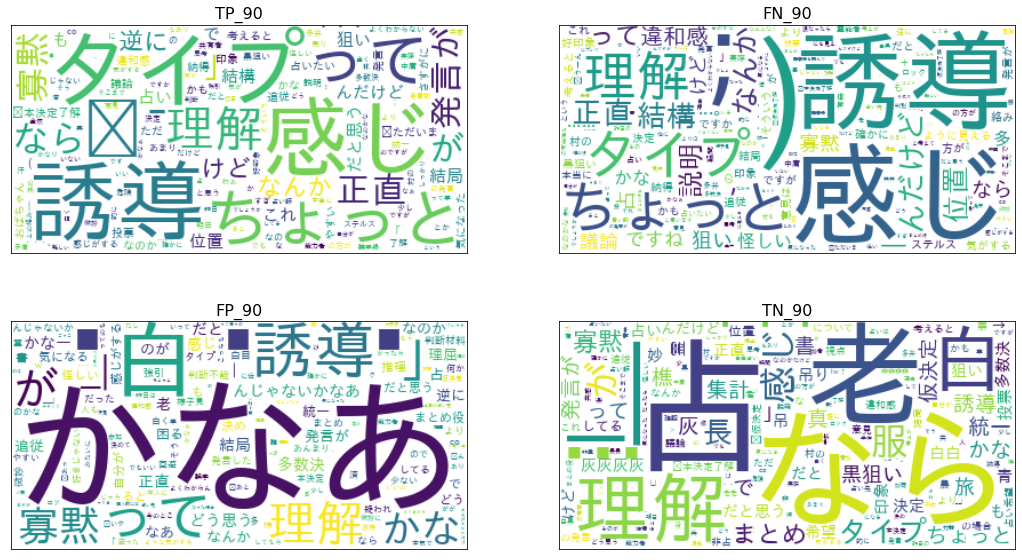

In [154]:
row=2
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP_90', 'FN_90', 'FP_90', 'TN_90']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [TP_90[5:], FN_90[5:], FP_90[5:], TN_90[5:]]]

for i, img in enumerate(wordcloud):
    _r= i//col
    _c= i%col
    ax[_r,_c].set_title(pred_class[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(img, interpolation="bilinear") # 画像を表示

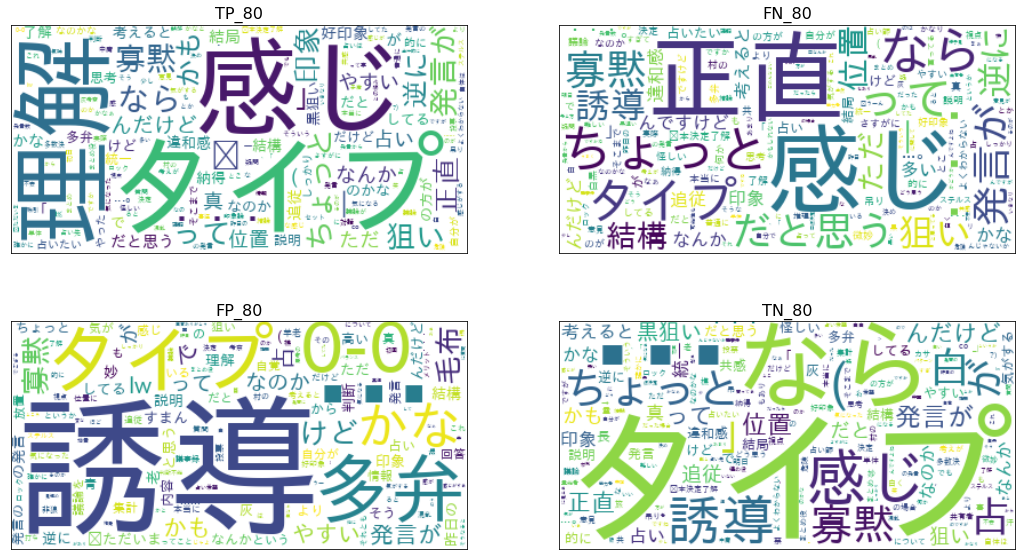

In [155]:
row=2
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP_80', 'FN_80', 'FP_80', 'TN_80']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [TP_80[5:], FN_80[5:], FP_80[5:], TN_80[5:]]]

for i, img in enumerate(wordcloud):
    _r= i//col
    _c= i%col
    ax[_r,_c].set_title(pred_class[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(img, interpolation="bilinear") # 画像を表示

In [157]:
print(u_TP.duplicated(subset='token').value_counts())
print(u_TN.duplicated(subset='token').value_counts())
print(u_FP.duplicated(subset='token').value_counts())
print(u_FN.duplicated(subset='token').value_counts())

False    2013
dtype: int64
False    5008
dtype: int64
False    157
dtype: int64
False    485
dtype: int64


In [159]:
u_TP

token  freq
821      好きだ    38
1328     ウフフ    27
1504      クク    24
2809      んや    14
2877      合理    14
...      ...   ...
12574    ろくな     2
12575     わお     2
12605  らないから     2
12606    らった     2
15330    余裕で     2

[2013 rows x 2 columns]

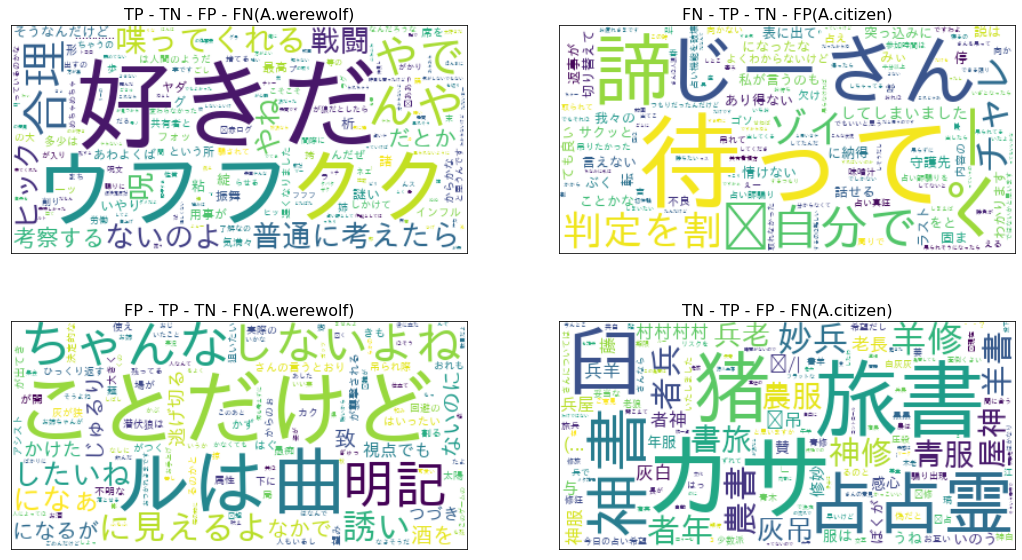

In [158]:
row=2
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP - TN - FP - FN(A.werewolf)', 'FN - TP - TN - FP(A.citizen)', 'FP - TP - TN - FN(A.werewolf)', 'TN - TP - FP - FN(A.citizen)']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [u_TP, u_FN, u_FP, u_TN]]

for i, img in enumerate(wordcloud):
    _r= i//col
    _c= i%col
    ax[_r,_c].set_title(pred_class[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(img, interpolation="bilinear") # 画像を表示

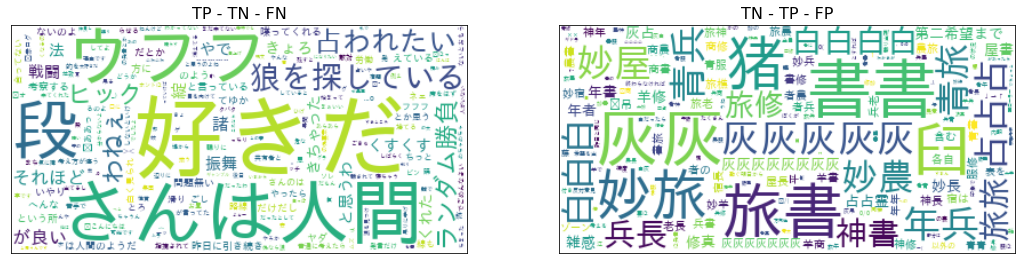

In [56]:
row=1
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP - TN - FN', 'TN - TP - FP']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [u_positive, u_negative]]

for i, img in enumerate(wordcloud):
    ax[i].set_title(pred_class[i], fontsize=16, color='black')
    ax[i].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[i].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[i].imshow(img, interpolation="bilinear") # 画像を表示

# bi-gram

In [27]:
import pandas as pd
import os

input_dir = '../../outputs/nested/HAN/baseline/200_dim200_ignore_pad_sp_new/plot_attention_bi-gram/csv/'

FN_60_50 = pd.read_csv(os.path.join(input_dir, 'FN_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_60_50 = pd.read_csv(os.path.join(input_dir, 'FP_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_60_50 = pd.read_csv(os.path.join(input_dir, 'TN_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_60_50 = pd.read_csv(os.path.join(input_dir, 'TP_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FN_70 = pd.read_csv(os.path.join(input_dir, 'FN_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_70 = pd.read_csv(os.path.join(input_dir, 'FP_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_70 = pd.read_csv(os.path.join(input_dir, 'TN_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_70 = pd.read_csv(os.path.join(input_dir, 'TP_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FN_80 = pd.read_csv(os.path.join(input_dir, 'FN_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_80 = pd.read_csv(os.path.join(input_dir, 'FP_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_80 = pd.read_csv(os.path.join(input_dir, 'TN_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_80 = pd.read_csv(os.path.join(input_dir, 'TP_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FN_90 = pd.read_csv(os.path.join(input_dir, 'FN_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_90 = pd.read_csv(os.path.join(input_dir, 'FP_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_90 = pd.read_csv(os.path.join(input_dir, 'TN_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_90 = pd.read_csv(os.path.join(input_dir, 'TP_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')

TP = TP_90
TN = TN_90
FP = FP_90
FN = FN_90
# TP = pd.concat((TP_90, TP_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
# TN = pd.concat((TN_90, TN_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
# FP = pd.concat((FP_90, FP_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
# FN = pd.concat((FN_90, FN_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
set_TP = set(TP['token'])
set_TN = set(TN['token'])
set_FP = set(FP['token'])
set_FN = set(FN['token'])

u_TP = ((set_TP - set_TN) - set_FP) - set_FN
u_TN = ((set_TN - set_TP) - set_FP) - set_FN
u_FP = ((set_FP - set_TN) - set_TP) - set_FN
u_FN = ((set_FN - set_TN) - set_FP) - set_TP
u_TP = TP[TP['token'].isin(list(u_TP))].sort_values(by='freq', ascending=False)
u_TN = TN[TN['token'].isin(list(u_TN))].sort_values(by='freq', ascending=False)
u_FP = FP[FP['token'].isin(list(u_FP))].sort_values(by='freq', ascending=False)
u_FN = FN[FN['token'].isin(list(u_FN))].sort_values(by='freq', ascending=False)


u_positive = (set_TP - set_TN) - set_FN
u_negative= (set_TN - set_TP) - set_FP
u_positive = TP[TP['token'].isin(list(u_positive))].sort_values(by='freq', ascending=False)
u_negative = TN[TN['token'].isin(list(u_negative))].sort_values(by='freq', ascending=False)

print("u_TP", len(u_TP))
print("u_TN", len(u_TN))
print("u_FP", len(u_FP))
print("u_FN", len(u_FN))
print("u_positive", len(u_positive))
print("u_negative", len(u_negative))


u_TP 30827
u_TN 73649
u_FP 1684
u_FN 5199
u_positive 30885
u_negative 74034


In [29]:
display(u_TP[:20])
display(u_TN[:20])
display(u_FP[:20])
display(u_FN[:20])

token  freq
2         |0|0    46
4           黒潜    40
9           潜黒    28
10       わぁ...    27
15          ぷか    26
16          ^y    26
17          y^    26
19      ですなwww    24
22      です...。    23
31        パクパク    18
33    ...おばちゃん    18
42      感じがする.    15
53   気になります...    14
65     ▁うーん・・・    13
68      だと思うもん    12
69        のよねぇ    12
76          (泣    11
77      ですね...    11
73       俺の意見は    11
101         潜片    10

token  freq
1       |灰灰灰灰    53
4          猪猪    45
8        _|_|    38
11         霊|    34
13        白白|    32
15         白|    29
25       残り人外    24
26       老老老老    23
28         臼臼    23
30  ＜person＞→    23
32         壱|    22
33      灰灰灰灰|    22
36         楽楽    21
34         羊|    21
39       長長長長    20
40  者＜person＞    20
38         |書    20
42         弐|    19
43         |樵    19
44         兵|    19

token  freq
4      微妙っちゃ     6
10       ?ボク     6
5      ありじゃろ     6
27      狼さん側     4
46    本人に任せる     4
43       軽さ」     4
39      年修者老     4
38      服兵年修     4
36      _|長書     4
33     ホント済み     4
32     済みません     4
29      ズバリ!     4
42       「軽さ     4
26    困るんだよね     4
17   ちゃんなんだね     4
25    のが一番困る     4
11        クサ     4
13  どうすればいいの     4
12      ゆう人も     4
18  今日の吊り先じい     4

token  freq
0          多多    13
2   +＜person＞     8
1   ＜person＞+     8
3      待って待って     7
4         !バシ     5
5         バシッ     5
6          投投     5
14      。。。かな     4
15        有無有     4
13      かな。。。     4
12       。。。?     4
10       か。。。     4
32      さて。。。     3
39    考えられます.     3
37   まとめ役をやって     3
36       。。けど     3
35      。。。更新     3
34      なら。。。     3
38       ですね.     3
31    。。。ちょっと     3

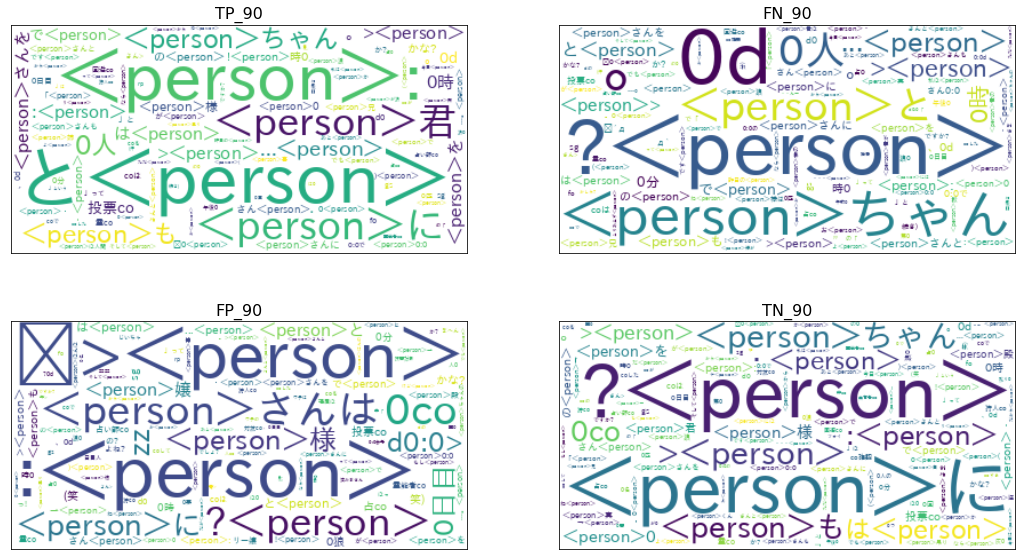

In [161]:
row=2
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP_90', 'FN_90', 'FP_90', 'TN_90']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [TP_90[15:], FN_90[15:], FP_90[15:], TN_90[15:]]]

for i, img in enumerate(wordcloud):
    _r= i//col
    _c= i%col
    ax[_r,_c].set_title(pred_class[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(img, interpolation="bilinear") # 画像を表示

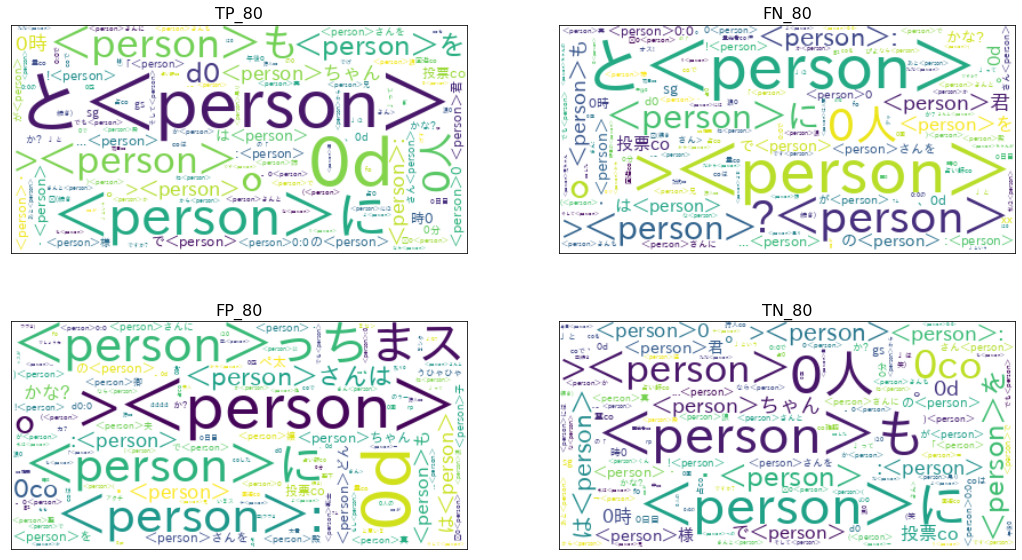

In [165]:
row=2
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP_80', 'FN_80', 'FP_80', 'TN_80']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [TP_80[15:], FN_80[15:], FP_80[15:], TN_80[15:]]]

for i, img in enumerate(wordcloud):
    _r= i//col
    _c= i%col
    ax[_r,_c].set_title(pred_class[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(img, interpolation="bilinear") # 画像を表示

In [166]:
u_TP[:15]

token  freq
222         んだじぇ   376
456        なんだじぇ   206
489         リージェ   194
539         オレ様は   182
789          ワン!   134
803           業者   132
805           愉悦   132
860           ぴこ   124
909          りぃざ   118
927          ごほっ   116
950   じぇ＜person＞   114
989      ...くすくす   110
1069         ,,ェ   104
1132   ＜person＞便    99
1267          d;    91

In [10]:
u_TP[:20]

token  freq
222         んだじぇ   376
456        なんだじぇ   206
489         リージェ   194
539         オレ様は   182
789          ワン!   134
803           業者   132
805           愉悦   132
860           ぴこ   124
909          りぃざ   118
927          ごほっ   116
950   じぇ＜person＞   114
989      ...くすくす   110
1069         ,,ェ   104
1132   ＜person＞便    99
1267          d;    91
1285         リズぴ    90
1286         豆まき    90
1339        ウフフ!    87
1359          尾行    86
1404         `,,    84

In [17]:
u_TP[:10]

token  freq
2     |0|0    46
4       黒潜    40
9       潜黒    28
10   わぁ...    27
15      ぷか    26
16      ^y    26
17      y^    26
19  ですなwww    24
22  です...。    23
31    パクパク    18

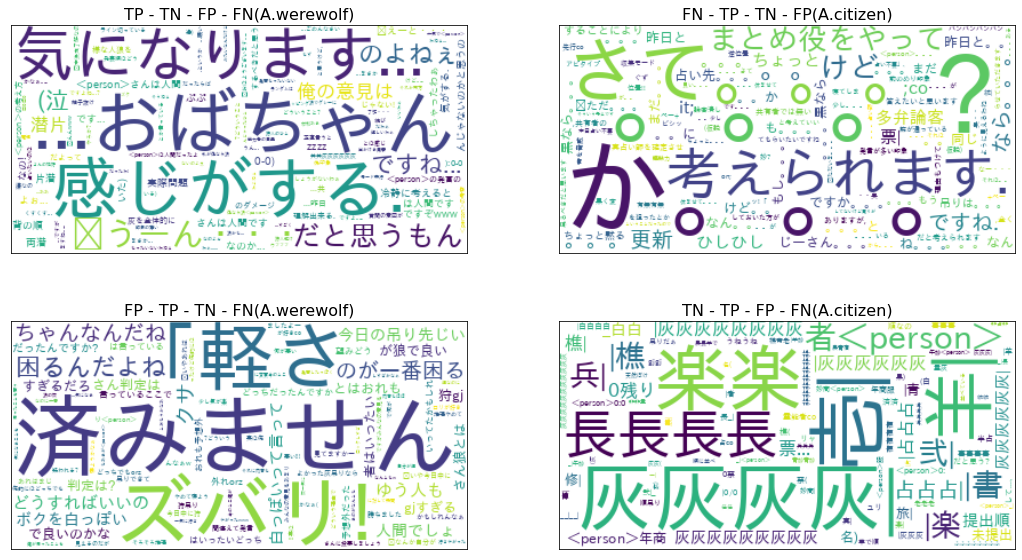

In [18]:
row=2
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP - TN - FP - FN(A.werewolf)', 'FN - TP - TN - FP(A.citizen)', 'FP - TP - TN - FN(A.werewolf)', 'TN - TP - FP - FN(A.citizen)']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [u_TP[10:], u_FN[10:], u_FP[10:], u_TN[10:]]]

for i, img in enumerate(wordcloud):
    _r= i//col
    _c= i%col
    ax[_r,_c].set_title(pred_class[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(img, interpolation="bilinear") # 画像を表示

In [35]:
u_negative[:15]

Unnamed: 0      token  freq
1            1      |灰灰灰灰    53
4            4         猪猪    45
8            8       _|_|    38
11          11         霊|    34
13          13        白白|    32
15          15         白|    29
21          21         |老    27
25          25       残り人外    24
26          26       老老老老    23
28          28         臼臼    23
29          29        |白白    23
30          30  ＜person＞→    23
33          33      灰灰灰灰|    22
32          32         壱|    22
34          34         羊|    21

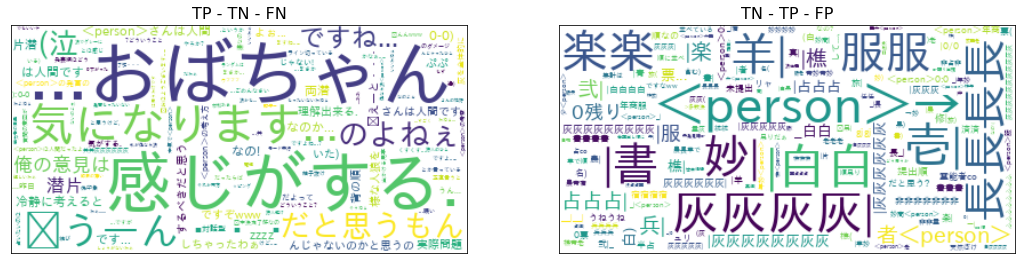

In [15]:
row=1
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP - TN - FN', 'TN - TP - FP']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [u_positive[10:], u_negative[10:]]]

for i, img in enumerate(wordcloud):
    ax[i].set_title(pred_class[i], fontsize=16, color='black')
    ax[i].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[i].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[i].imshow(img, interpolation="bilinear") # 画像を表示

# tri

In [19]:
import pandas as pd
import os

input_dir = '../../outputs/nested/HAN/baseline/200_dim200_ignore_pad_sp_new/plot_attention_tri-gram/csv/'

FN_60_50 = pd.read_csv(os.path.join(input_dir, 'FN_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_60_50 = pd.read_csv(os.path.join(input_dir, 'FP_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_60_50 = pd.read_csv(os.path.join(input_dir, 'TN_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_60_50 = pd.read_csv(os.path.join(input_dir, 'TP_60_50_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FN_70 = pd.read_csv(os.path.join(input_dir, 'FN_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_70 = pd.read_csv(os.path.join(input_dir, 'FP_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_70 = pd.read_csv(os.path.join(input_dir, 'TN_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_70 = pd.read_csv(os.path.join(input_dir, 'TP_70_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FN_80 = pd.read_csv(os.path.join(input_dir, 'FN_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_80 = pd.read_csv(os.path.join(input_dir, 'FP_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_80 = pd.read_csv(os.path.join(input_dir, 'TN_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_80 = pd.read_csv(os.path.join(input_dir, 'TP_80_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FN_90 = pd.read_csv(os.path.join(input_dir, 'FN_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')
FP_90 = pd.read_csv(os.path.join(input_dir, 'FP_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TN_90 = pd.read_csv(os.path.join(input_dir, 'TN_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')
TP_90 = pd.read_csv(os.path.join(input_dir, 'TP_90_vital_word_freq.csv')).drop(columns='Unnamed: 0')

TP = TP_90
TN = TN_90
FP = FP_90
FN = FN_90
# TP = pd.concat((TP_90, TP_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
# TN = pd.concat((TN_90, TN_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
# FP = pd.concat((FP_90, FP_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
# FN = pd.concat((FN_90, FN_80), axis=0).groupby('token').sum().sort_values(by='freq', ascending=False).reset_index()
set_TP = set(TP['token'])
set_TN = set(TN['token'])
set_FP = set(FP['token'])
set_FN = set(FN['token'])

u_TP = ((set_TP - set_TN) - set_FP) - set_FN
u_TN = ((set_TN - set_TP) - set_FP) - set_FN
u_FP = ((set_FP - set_TN) - set_TP) - set_FN
u_FN = ((set_FN - set_TN) - set_FP) - set_TP
u_TP = TP[TP['token'].isin(list(u_TP))].sort_values(by='freq', ascending=False)
u_TN = TN[TN['token'].isin(list(u_TN))].sort_values(by='freq', ascending=False)
u_FP = FP[FP['token'].isin(list(u_FP))].sort_values(by='freq', ascending=False)
u_FN = FN[FN['token'].isin(list(u_FN))].sort_values(by='freq', ascending=False)


u_positive = (set_TP - set_TN) - set_FN
u_negative= (set_TN - set_TP) - set_FP
u_positive = TP[TP['token'].isin(list(u_positive))].sort_values(by='freq', ascending=False)
u_negative = TN[TN['token'].isin(list(u_negative))].sort_values(by='freq', ascending=False)

print("u_TP", len(u_TP))
print("u_TN", len(u_TN))
print("u_FP", len(u_FP))
print("u_FN", len(u_FN))
print("u_positive", len(u_positive))
print("u_negative", len(u_negative))


u_TP 32247
u_TN 78026
u_FP 1784
u_FN 5450
u_positive 32251
u_negative 78054


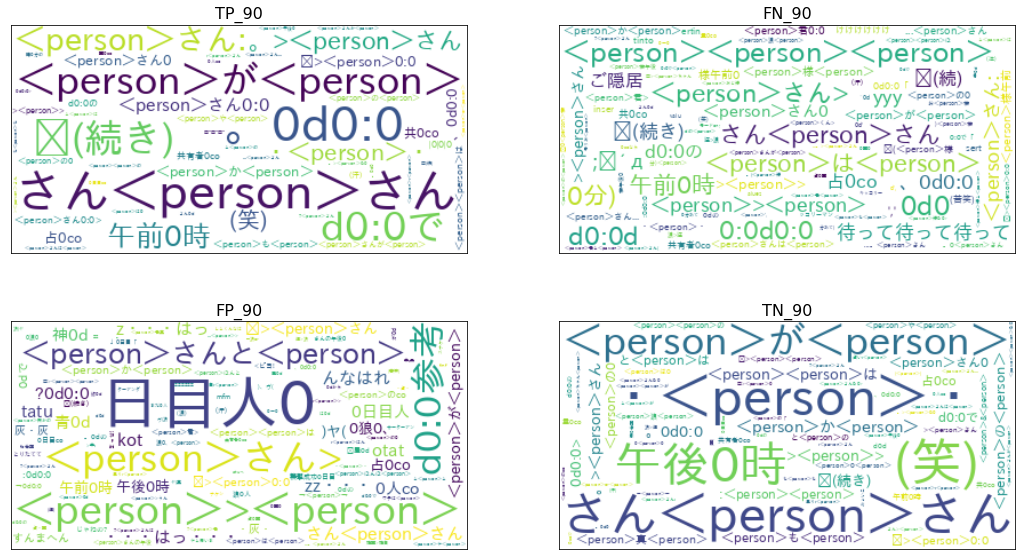

In [169]:
row=2
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP_90', 'FN_90', 'FP_90', 'TN_90']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [TP_90[15:], FN_90[15:], FP_90[15:], TN_90[15:]]]

for i, img in enumerate(wordcloud):
    _r= i//col
    _c= i%col
    ax[_r,_c].set_title(pred_class[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(img, interpolation="bilinear") # 画像を表示

In [ ]:
row=2
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP_80', 'FN_80', 'FP_80', 'TN_80']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [TP_80[15:], FN_80[15:], FP_80[15:], TN_80[15:]]]

for i, img in enumerate(wordcloud):
    _r= i//col
    _c= i%col
    ax[_r,_c].set_title(pred_class[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(img, interpolation="bilinear") # 画像を表示

In [ ]:
TP_90

In [25]:
u_TN[:20]

token  freq
0                   猪猪猪    40
1                バカバカバカ    37
2                   |霊|    25
3                  |白白|    17
4                   |白|    17
5                  灰0残り    16
6               白白|灰灰灰灰    15
7                   楽|楽    15
12                0残り人外    13
11                  |楽楽    13
10          |灰灰灰灰灰灰灰灰灰灰    13
13               |灰灰灰灰|    12
14               長長長長長長    12
15                  役|霊    12
22           |＜person＞|    11
25  ＜person＞＜person＞0:0    11
24                  臼臼臼    11
23                |占占占|    11
20                  |老|    11
21                提出順なの    11

In [22]:
u_TP[:20]

token  freq
1           |0|0|0    44
2              潜黒潜    28
3              ^y^    26
4              y^y    24
6              汗汗汗    16
7           パクパクパク    15
8              段0段    14
9              黒潜黒    14
11          ▁|▁̄▁̄    12
12           ▁̄▁̄|    12
13   ＜person＞は人間です    10
16            叩いた)     9
20          ):0-0)     8
21    0-0)＜person＞     8
19          0能力者co     8
18        について0能力者     8
23        ...眠い...     7
24           ?投票co     7
91         さが0下がった     6
102        なのよぉ...     6

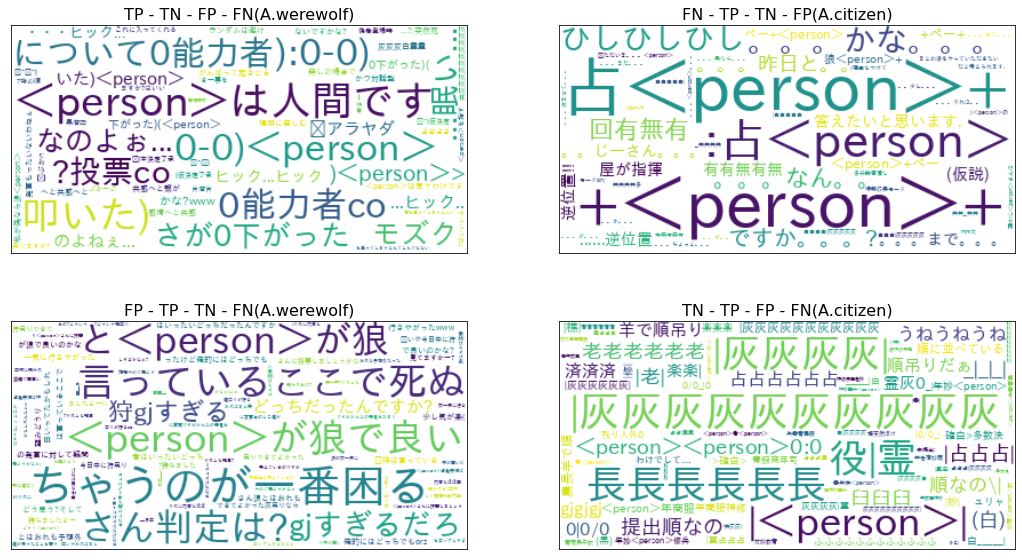

In [23]:
row=2
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP - TN - FP - FN(A.werewolf)', 'FN - TP - TN - FP(A.citizen)', 'FP - TP - TN - FN(A.werewolf)', 'TN - TP - FP - FN(A.citizen)']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [u_TP[10:], u_FN[10:], u_FP[10:], u_TN[10:]]]

for i, img in enumerate(wordcloud):
    _r= i//col
    _c= i%col
    ax[_r,_c].set_title(pred_class[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(img, interpolation="bilinear") # 画像を表示

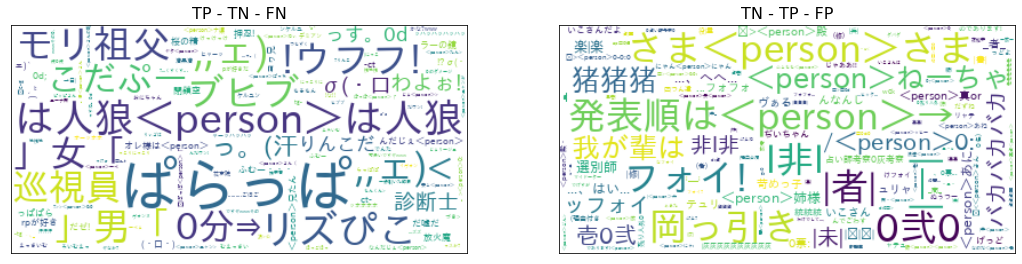

In [173]:
row=1
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP - TN - FN', 'TN - TP - FP']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [u_positive[15:], u_negative[15:]]]

for i, img in enumerate(wordcloud):
    ax[i].set_title(pred_class[i], fontsize=16, color='black')
    ax[i].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[i].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[i].imshow(img, interpolation="bilinear") # 画像を表示

## Threshold according to the length of a sentence / a word

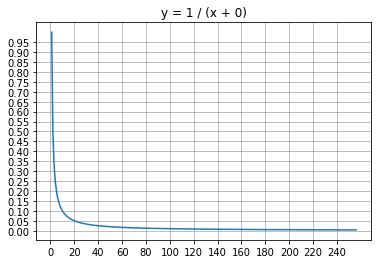

In [33]:
import matplotlib.pyplot as plt
import numpy as np
a = 1
b = 0

x = np.linspace( 1, 256, 256)
y = a / x
plt.plot(x, y)
plt.title(f'y = {a} / (x + {b})')
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.xticks(np.arange(0,256,20))
plt.yticks(np.arange(0,1,0.05))
plt.show()

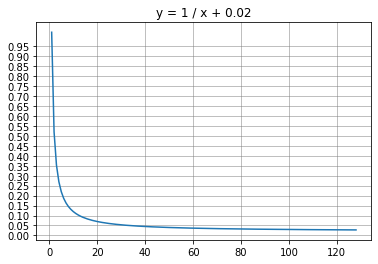

In [29]:
import matplotlib.pyplot as plt
import numpy as np
a = 1
b = 0.02

x = np.linspace( 1, 128, 128)
y = a / x + b
plt.plot(x, y)
plt.title(f'y = {a} / x + {b}')
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.xticks(np.arange(0,128,20))
plt.yticks(np.arange(0,1,0.05))
plt.show()